# Problem 1
## 1a
### The Perceptron algorithm converges on the given data because the data is linearly separable. 

Accuracy after 1 epoch: 50.00%


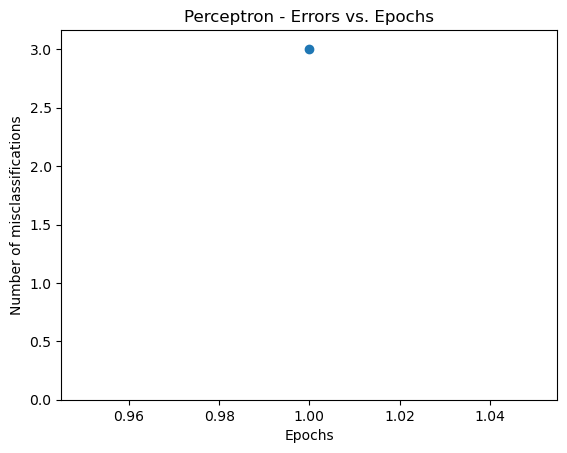

Bias after 1 epoch: 0.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

data = {
    'Input': [1, 2, 3, 4],
    'Output': [0, 0, 1, 1]
}

df = pd.DataFrame(data)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

class Perceptron:
    """
        Perception classifier.

        Parameters
        ------------
        eta : float # Learning rate (between 0.0 and 1.0)
        n_iter : int # Passes over the training set
        random_state : int # Random number generator seed for random weight initialization

        Attributes
        -------------
        w_ : 1d-array # Weights after fitting
        b_ : Scalar # Bias unit after fitting
        errors_ : list # Number of misclassifications (updates) in each epoch
    """

    def __init__(self, eta=0.1, n_iter=1, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
            Fit training data.

            Parameters 
            -----------
            X : {array-like}, shape = [n_examples, n_features] 
                Training vectors, where n_examples is the number of examples 
                and n_features is the number of features
            y : array-like, shape = [n_examples] 
                Target values

            Returns
            --------
            self : object
        """

        # Initialize weights to 0.1 for all features
        self.w_ = np.full(X.shape[1], 0.1)
        
        # Initialize bias to 0.1
        self.b_ = np.float_(0.1)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            # Append errors for the epoch after processing all examples
            self.errors_.append(errors)
        
        return self

    
    def net_input(self, X):
        # Calculate net input
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        # Return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, 0)


ppn = Perceptron(eta=0.1, n_iter=1)


ppn.fit(X, y)

y_pred = ppn.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy after 1 epoch: {accuracy * 100:.2f}%")

# Plotting the number of misclassifications over epochs
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Errors vs. Epochs')
plt.ylim(bottom=0)
plt.show()

print(f"Bias after 1 epoch: {ppn.b_}")



## 1C
### Assume that the Adaline model trained to this data has weight and bias of 0.1. Compute the average loss over the training examples



In [ ]:
## 1D 

Accuracy after 10 epochs: 50.00%
Weights after 10 epochs: [-0.2  0.   0. ]
Bias after 10 epochs: 0.0


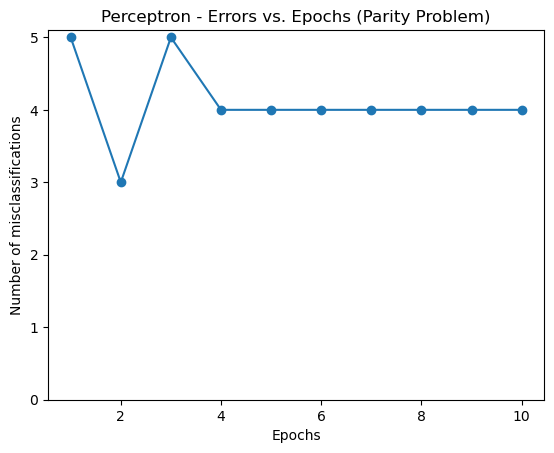

In [5]:
# Problem 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

data = {
    'Input1': [0, 0, 0, 0, 1, 1, 1, 1],
    'Input2': [0, 0, 1, 1, 0, 0, 1, 1],
    'Input3': [0, 1, 0, 1, 0, 1, 0, 1],
    'Output': [1, 0, 0, 1, 0, 1, 1, 0]  
}

df = pd.DataFrame(data)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

class Perceptron:
    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        self.w_ = np.full(X.shape[1], 0.1)
        self.b_ = np.float_(0.1)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

y_pred = ppn.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy after 10 epochs: {accuracy * 100:.2f}%")
print(f"Weights after 10 epochs: {ppn.w_}")
print(f"Bias after 10 epochs: {ppn.b_}")

plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Errors vs. Epochs (Parity Problem)')
plt.ylim(bottom=0)
plt.show()

# TODO: SUBMIT THE DIAGRAM


In [11]:
# Problem 3

import numpy as np
from sklearn import svm

X = np.array([[1,1], [1,2], [2,1], [0,0], [1,0], [0,1]])
y =np.array([1, 1, 1, 0, 0, 0])

clf = svm.SVC(C=1e8, kernel='linear')
clf.fit(X,y)

w = clf.coef_[0]
b = clf.intercept_[0]

support_vectors = clf.support_vectors_

margin = 2 / np.linalg.norm(2)

print(f"Weight vector (w): {w}")
print(f"Bias (b): {b}")
print(f"Support Vectors: {support_vectors}")
print(f"Margin: {margin:.4f}")

Weight vector (w): [2. 2.]
Bias (b): -3.0
Support Vectors: [[1. 0.]
 [0. 1.]
 [1. 1.]]
Margin: 1.0000


In [17]:
# Problem 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

file_path = "/Users/efang/Desktop/coding/Intro-to-ML/CSDS340/data/wine.data.csv"

wine_data = pd.read_csv(file_path, header=None)

wine_data.head()

X = wine_data.iloc[:, 1:].values
y = wine_data.iloc[:, 0].values

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.5, random_state = 1)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

logreg = LogisticRegression(random_state=1, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

Logistic Regression Accuracy: 0.9887640449438202


In [20]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=1)
svm_rbf = SVC(kernel='rbf', gamma=0.1, random_state=1)
svm_poly = SVC(kernel='poly', degree=3, random_state=1) 

svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
svm_linear_accuracy = accuracy_score(y_test, y_pred_svm_linear)

svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, y_pred_svm_rbf)

svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
svm_poly_accuracy = accuracy_score(y_test, y_pred_svm_poly)

print(f"SVM Polynomial: {svm_poly_accuracy}")
print(f"SVM RBF: {svm_rbf_accuracy}")
print(f"SVM Linear: {svm_linear_accuracy}")


SVM Polynomial: 0.9438202247191011
SVM RBF: 1.0
SVM Linear: 0.9438202247191011


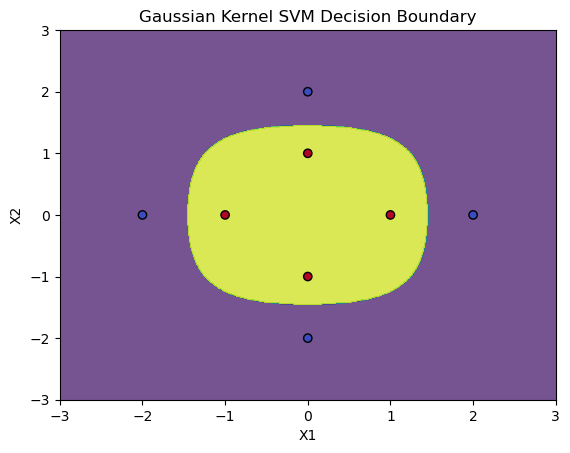

In [25]:
# Problem 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


X = np.array([[0,1], [-1, 0], [1,0], [0, -1], [0,2], [2,0], [-2, 0], [0, -2]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

clf = SVC(kernel='rbf', gamma='auto', C=1.0)  # Using RBF kernel
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('Gaussian Kernel SVM Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


